In [1]:
from numpy.random import seed
seed(1010)

## Implementation in Scikit-Learn

![](https://www.evernote.com/l/AAGiYGcKcIxIaJ7sCg97K9JDtUO2dY9mywoB/image.png )

### Raw Text Data

<img src="https://www.evernote.com/l/AAFfAyDQQ1xGPLTIxT2hcUSLrHuQDbYzsuYB/image.png" width=600px>

Here each line of text is a **document** and the collection of all lines of text is the **body**.

In [4]:
%sh curl --remote-name-all 'https://joshua-databricks.s3-us-west-2.amazonaws.com/text-data/pagesParsed.json'

% Total % Received % Xferd Average Speed Time Time Time Current
 Dload Upload Total Spent Left Speed

 0 0 0 0 0 0 0 0 --:--:-- --:--:-- --:--:-- 0
 98 10.3M 98 10.2M 0 0 54.2M 0 --:--:-- --:--:-- --:--:-- 54.0M
100 10.3M 100 10.3M 0 0 54.2M 0 --:--:-- --:--:-- --:--:-- 54.0M

In [5]:
dbutils.fs.cp("file:/databricks/driver/pagesParsed.json", "dbfs:/FileStore/tmp/pagesParsed.json")

Out[ 3 ]: True

In [6]:
wikiDF = spark.read.json("/FileStore/tmp/pagesParsed.json")

wiki_df = wikiDF.toPandas()
display(wiki_df) 

category text title Jazz Jazz is a music genre that originated in the African-American communities of New Orleans, United States. It originated in the late 19th and early 20th centuries, and developed from roots in blues and ragtime. Jazz is seen by many as "America's classical music". Since the 1920s Jazz Age, jazz has become recognized as a major form of musical expression. It then emerged in the form of independent traditional and popular musical styles, all linked by the common bonds of African-American and European-American musical parentage with a performance orientation. Jazz is characterized by swing and blue notes, call and response vocals, polyrhythms and improvisation. Jazz has roots in West African cultural and musical expression, and in African-American music traditions including blues and ragtime, as well as European military band music. Intellectuals around the world have hailed jazz as "one of America's original art forms".As jazz spread around the world, it drew on national, regional, and local musical cultures, which gave rise to different styles. New Orleans jazz began in the early 1910s, combining earlier brass-band marches, French quadrilles, biguine, ragtime and blues with collective polyphonic improvisation. In the 1930s, heavily arranged dance-oriented swing big bands, Kansas City jazz, a hard-swinging, bluesy, improvisational style and Gypsy jazz (a style that emphasized musette waltzes) were the prominent styles. Bebop emerged in the 1940s, shifting jazz from danceable popular music toward a more challenging "musician's music" which was played at faster tempos and used more chord-based improvisation. Cool jazz developed near the end of the 1940s, introducing calmer, smoother sounds and long, linear melodic lines.
The 1950s saw the emergence of free jazz, which explored playing without regular meter, beat and formal structures, and in the mid-1950s, hard bop emerged, which introduced influences from rhythm and blues, gospel, and blues, especially in the saxophone and piano playing. Modal jazz developed in the late 1950s, using the mode, or musical scale, as the basis of musical structure and improvisation. Jazz-rock fusion appeared in the late 1960s and early 1970s, combining jazz improvisation with rock music's rhythms, electric instruments, and highly amplified stage sound. In the early 1980s, a commercial form of jazz fusion called smooth jazz became successful, garnering significant radio airplay. Other styles and genres abound in the 2000s, such as Latin and Afro-Cuban jazz.


== Etymology and definition ==

The origin of the word jazz has resulted in considerable research, and its history is well documented. It is believed to be related to jasm, a slang term dating back to 1860 meaning "pep, energy". The earliest written record of the word is in a 1912 article in the Los Angeles Times in which a minor league baseball pitcher described a pitch which he called a "jazz ball" "because it wobbles and you simply can't do anything with it".The use of the word in a musical context was documented as early as 1915 in the Chicago Daily Tribune. Its first documented use in a musical context in New Orleans was in a November 14, 1916 Times-Picayune article about "jas bands". In an interview with NPR, musician Eubie Blake offered his recollections of the slang connotations of the term, saying, "When Broadway picked it up, they called it 'J-A-Z-Z'. It wasn't called that. It was spelled 'J-A-S-S'. That was dirty, and if you knew what it was, you wouldn't say it in front of ladies." The American Dialect Society named it the Word of the 20th Century.Jazz is difficult to define because it encompasses a wide range of music spanning a period of over 100 years, from ragtime to the rock-infused fusion. Attempts have been made to define jazz from the perspective of other musical traditions, such as European music history or African music. But critic Joachim-Ernst Berendt argues that its terms of reference and its definit

In [7]:
display(wiki_df.groupby('category').count())

text,title
798,798
1050,1050


### Document-Term Matrix

<img src="https://www.evernote.com/l/AAFtjaKOjT5CYr5N_NPHKU6vpBWNnBgbWLIB/image.png" width=600px>

The Document-Term Matrix can be created using the `TfidfVectorizer` model [[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) in Scikit-Learn.

In [9]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def no_number_preprocessor(tokens):
    r = re.sub('(\d)+', '', tokens.lower())
    # This alternative just removes numbers:
    # r = re.sub('(\d)+', '', tokens.lower())
    return r
  
vectorizer = TfidfVectorizer(stop_words='english', 
                             preprocessor=no_number_preprocessor)
bag_of_words = vectorizer.fit_transform(wiki_df.text)

In [10]:
bag_of_words.shape

Out[ 14 ]: (1848, 51090)

### Singular Value Decomposition

<img src="https://www.evernote.com/l/AAEhTiOBufhPwKBx-Hgufx4XZ5XyfsCp8cMB/image.png" width=600px>

This can be achieved using the `TruncatedSVD` model. 

The function is named "truncated" SVD because it is capable of returning a dataset with fewer features than it is passed without significant loss of information, that is, it is great for reducing the dimension of data.

In [12]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(bag_of_words)

In [13]:
lsa.shape

Out[ 31 ]: (1848, 2)

In [14]:
lsa[0]

Out[ 36 ]: array([ 0.42433078, -0.05950464])

In [15]:
lsa[0][0]

Out[ 35 ]: 0.42433078328925949

### Topic Encoded Data

<img src="https://www.evernote.com/l/AAGhSgfs1nZHAIYfbnmNaHU8YjMV2i9fTmgB/image.png" width=600px>

The process transforms the original data into **topic-encoded data**.

Here, each row is indexed by its original text value. The data now consists of two columns of data one representing each of the two topics used to encode the **body**. Recall that this value of 2 was passed as an argument to the `TruncatedSVD` in the previous step.

In [17]:
import pandas as pd

topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df["title"] = wiki_df.title
topic_encoded_df["is_baseball"] = wiki_df.category == "Baseball"
display(topic_encoded_df[["title", "topic_1", "topic_2", "is_baseball"]])

title,topic_1,topic_2,is_baseball
Jazz,0.4243307832892595,-0.059504643701443594,false
Outline of jazz,0.3168318039665839,-0.08293408674356065,false
All About Jazz,0.15483331254914356,-0.01979697365526161,false
Glossary of jazz and popular music,0.23373191733276766,0.05081562308317262,false
Multi-instrumentalist,0.1749533759808951,0.028381935153284316,false
Baseball,0.557575110013571,0.6059055513104888,true
Baseball Chapel,0.07389601948594024,0.06723438006254648,true
Baseball robot,0.07394635824312534,0.08595514301597536,true
Baseball5,0.2817246290637445,0.3837544061833769,true
Burkina Faso national baseball team,0.10600725821409009,0.10882674303794117,true


## Byproducts of the Latent Semantic Analysis

The LSA generates a few byproducts that are useful for analysis:

- the **dictionary** or the set of all words that appear at least once in the **body**
- the **encoding matrix** used to encode the documents into topics. The **encoding matrix** can be studied to gain an understanding of the **topics** that are latent to the **body**.

#### The Dictionary

The dictionary is an attribute of a fit `TfidfVectorizer` model and can be accessed using the `.get_feature_names` method.

In [20]:
import random 
dictionary = vectorizer.get_feature_names()
for _ in range(10):
  print(random.choice(dictionary))

solly
importance
dibble
lct
companies
locks
wheat
carefree
embarcadero
pumpenvalve

#### The Encoding Matrix

The **encoding matrix** is comprised of the `components_` stored as an attribute of a fit `TruncatedSVD`. We can examine this matrix to gain an understanding of the **topics** latent to the **body**.

**Note:** in `sklearn`, attributes of a model that are generated by a fitting process have a trailing underscore in their name as can be seen here with `svd.components_`.

In [22]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=['topic_1', 'topic_2'],
                               columns=dictionary).T
encoding_matrix["dictionary"] = dictionary
display(encoding_matrix.sample(10))

topic_1,topic_2,dictionary
4.5838316780796565E-5,-5.122053917015241E-6,archetype
6.73226943216172E-4,-6.427381332190548E-5,valburn
5.875510225266145E-4,6.011599678443168E-4,fined
2.2145118465775304E-4,8.431126533040837E-5,attested
1.4910080156097302E-4,-1.639437643191223E-5,lynette
4.038594728391982E-5,1.908068902970163E-6,hurston
0.002165101261269166,-4.047233345295689E-4,tin
7.79138075316944E-5,1.4473323381437522E-5,dura
0.005408332109133298,0.004358926137383911,consists
7.571567915964044E-4,-1.5981631839552895E-4,sells


#### Interpret The Encoding Matrix

What are the top words for each topic? What dimensions in word-space explain most of the variance in the data? 

To analyze this, we will need to look at the *absolute value* of the expression of each word in the topic.

In [24]:
display(encoding_matrix.sort_values('topic_1', ascending=False).head(20))

topic_1,topic_2,dictionary
0.3167756283161398,-0.28572413579355804,american
0.2864281845929861,-0.3390808396536463,died
0.24574848283435138,-0.10847840406030193,jazz
0.22277066290537292,0.26962872191405135,baseball
0.1776287407736353,-0.19601242327062737,composer
0.1721185723152752,-0.17993521889740116,born
0.1585785713617531,-0.17538748836450432,pianist
0.15662626294655926,0.18997524367964047,league
0.14145304366824182,0.20517144252834907,ball
0.13805990329660542,-0.15418983679457793,saxophonist


In [25]:
display(encoding_matrix.sort_values('topic_2', ascending=False).head(20))

topic_1,topic_2,dictionary
0.22277066290537292,0.26962872191405135,baseball
0.14145304366824182,0.20517144252834907,ball
0.1274677071771937,0.18999344554542694,base
0.15662626294655926,0.18997524367964047,league
0.13794207968248032,0.17956244622017012,game
0.08931181370041134,0.1357937362154195,batter
0.0899006114348235,0.1297872687206348,pitcher
0.09710165388173786,0.1233833799305931,team
0.06671362772337872,0.10530238892587512,runner
0.07351885480024595,0.09505126664465542,home


### Plot Topic Encoded Data

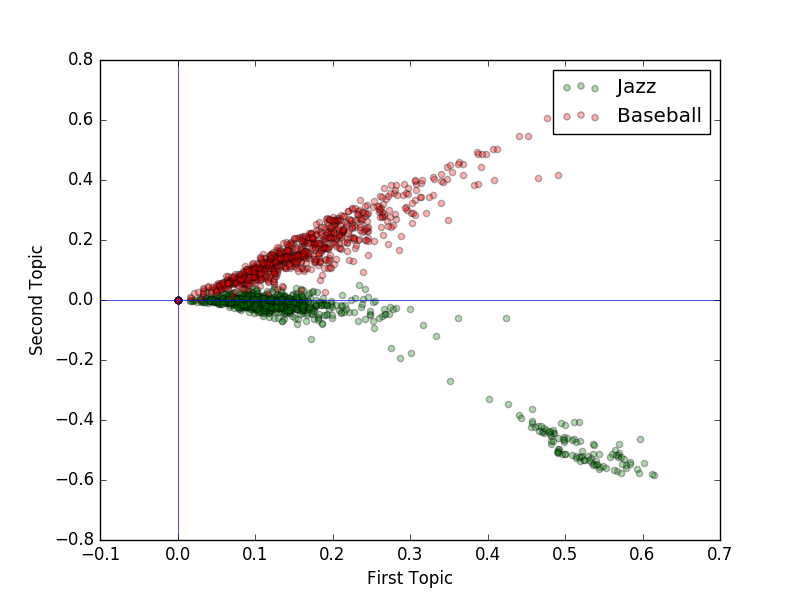

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for val in topic_encoded_df.is_baseball.unique():
  topic_1 = topic_encoded_df[topic_encoded_df.is_baseball == val]['topic_1'].values
  topic_2 = topic_encoded_df[topic_encoded_df.is_baseball == val]['topic_2'].values
  print(val)
  color = "red" if val else "green"
  label = "Baseball" if val else "Jazz"
  ax.scatter(topic_1, topic_2, c=color, alpha=0.3, label=label)
# made the colors represent different books

ax.set_xlabel('First Topic')
ax.set_ylabel('Second Topic')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

display(fig)

In [28]:
topic_encoded_df.columns

Out[ 53 ]: Index(['topic_1', 'topic_2', 'title', 'is_baseball'], dtype='object')

## Document Clustering via Gaussian Mixture Model

In [30]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(topic_encoded_df[["topic_1", "topic_2"]])
labels = gmm.predict(topic_encoded_df[["topic_1", "topic_2"]])

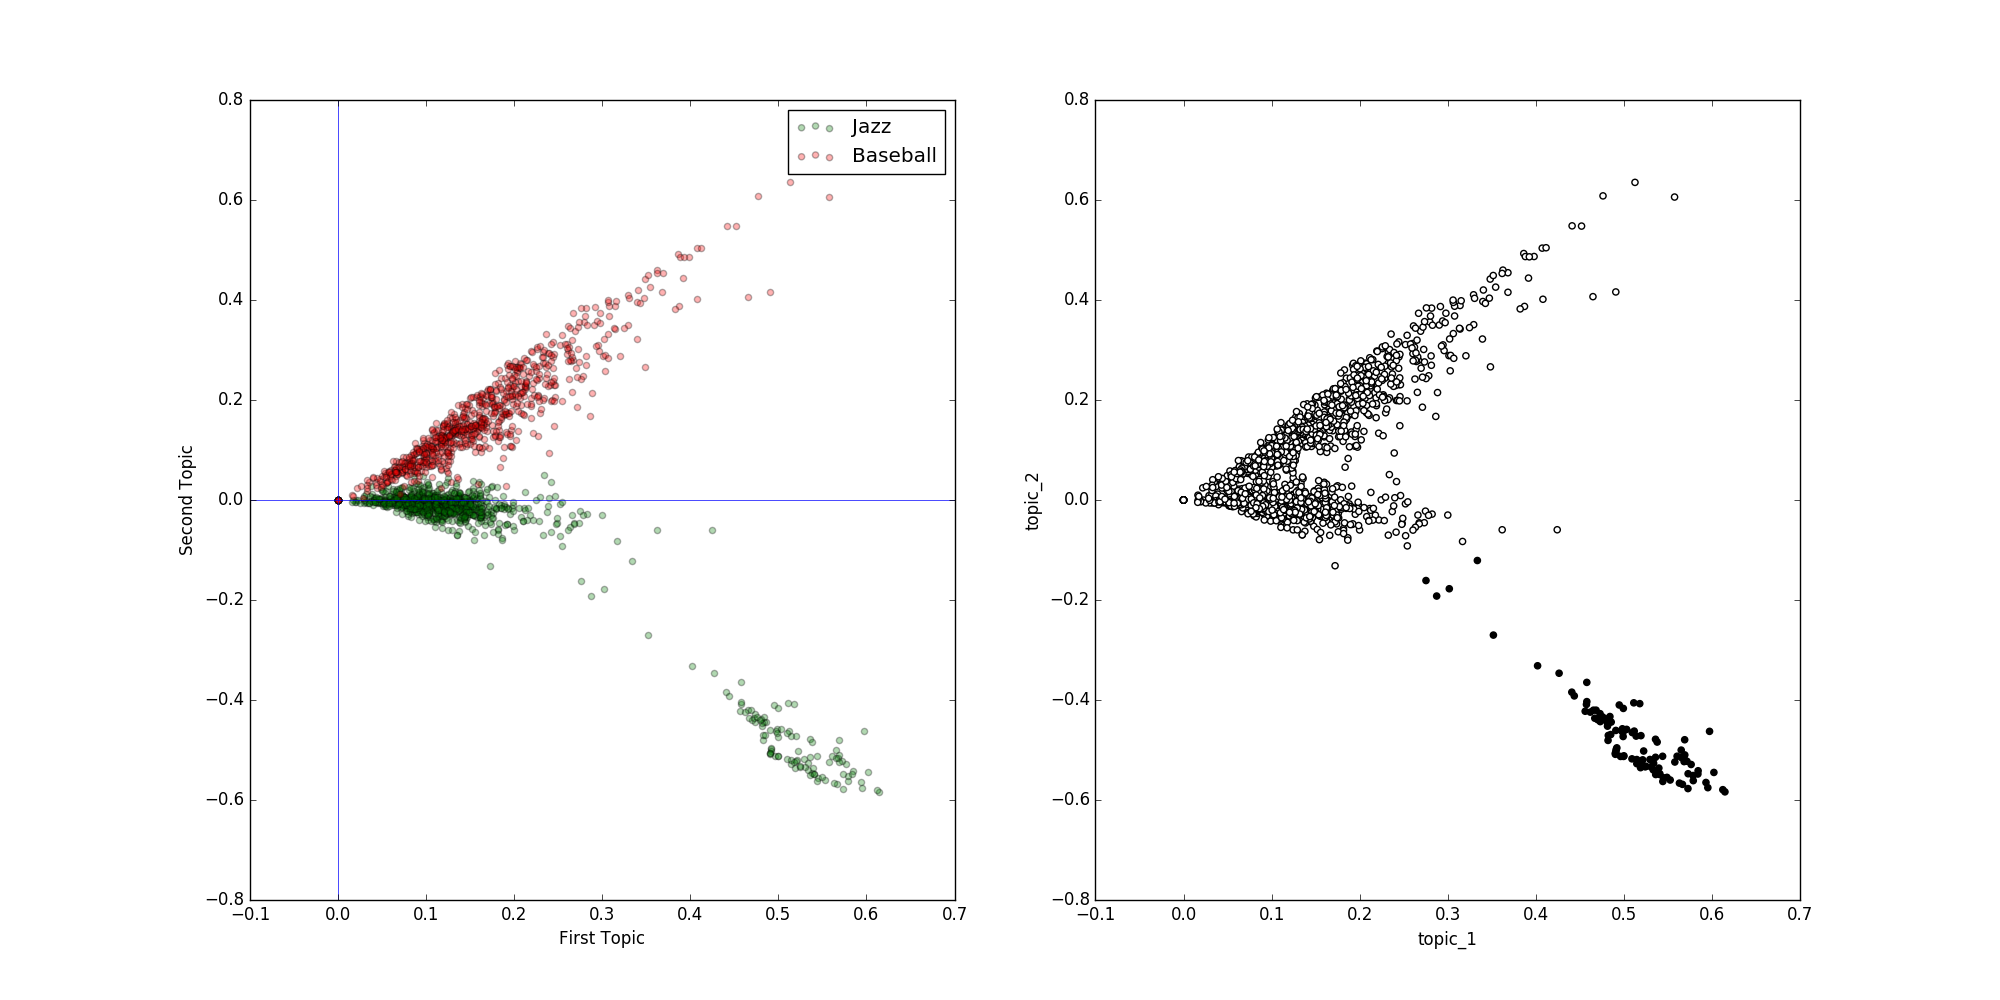

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(20,10))

for val in topic_encoded_df.is_baseball.unique():
  topic_1 = topic_encoded_df[topic_encoded_df.is_baseball == val]['topic_1'].values
  topic_2 = topic_encoded_df[topic_encoded_df.is_baseball == val]['topic_2'].values
  print(val)
  color = "red" if val else "green"
  label = "Baseball" if val else "Jazz"
  ax[0].scatter(topic_1, topic_2, c=color, alpha=0.3, label=label)
  
topic_encoded_df.plot(kind="scatter", x="topic_1", y="topic_2", c=labels, ax=ax[1])  
# made the colors represent different books

ax[0].set_xlabel('First Topic')
ax[0].set_ylabel('Second Topic')
ax[0].axvline(linewidth=0.5)
ax[0].axhline(linewidth=0.5)
ax[0].legend()

display(fig)

## Revised Topic Model

In [33]:
svd = TruncatedSVD(n_components=100)
lsa = svd.fit_transform(bag_of_words)

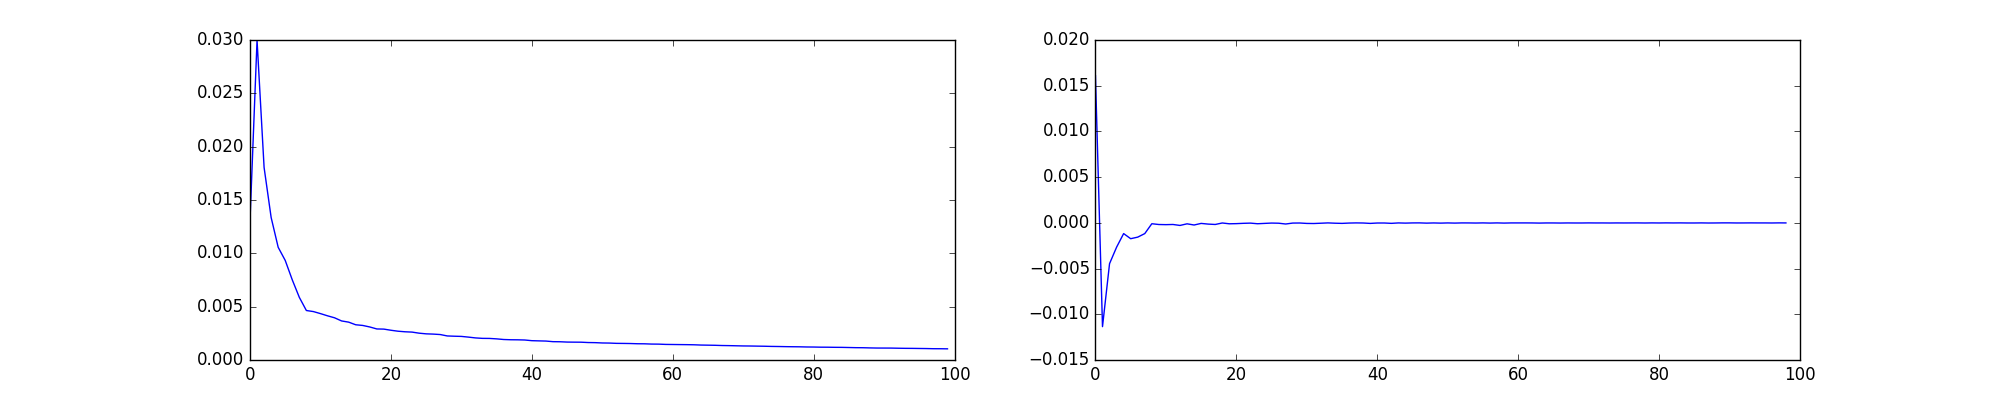

In [34]:
import numpy as np
fig, ax = plt.subplots(1,2, figsize=(20,4))
ax[0].plot(svd.explained_variance_ratio_)
ax[1].plot(np.diff(svd.explained_variance_))
display(fig)

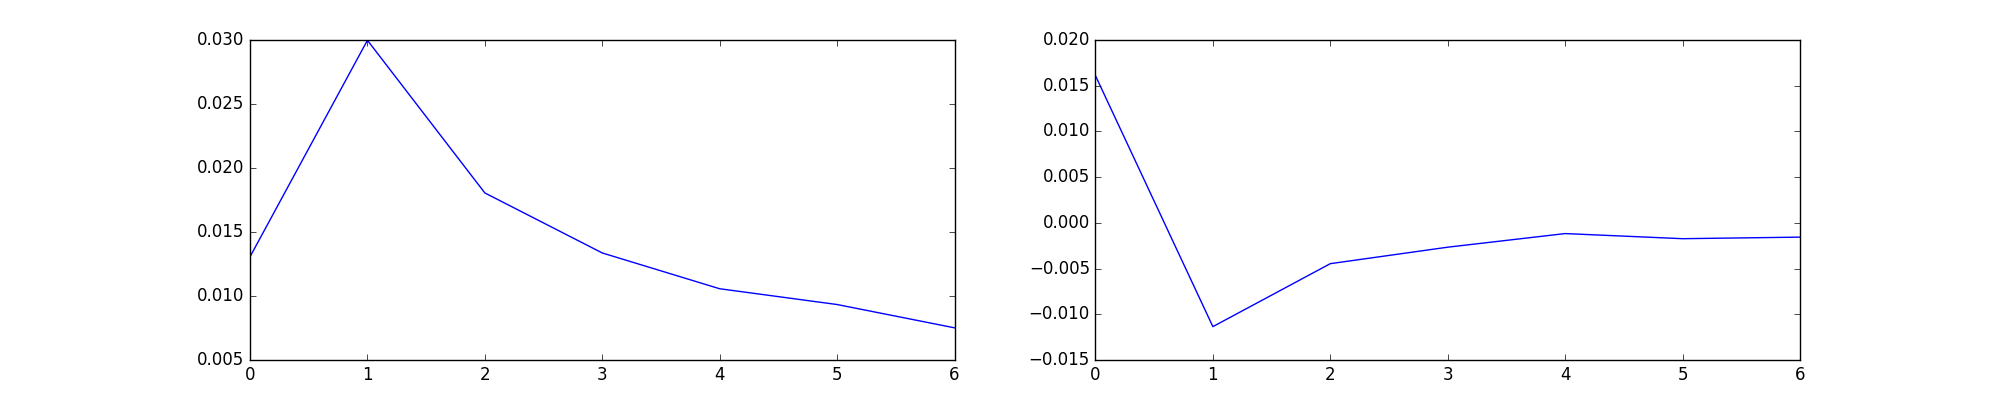

In [35]:
import numpy as np
fig, ax = plt.subplots(1,2, figsize=(20,4))
ax[0].plot(svd.explained_variance_ratio_[:7])
ax[1].plot(np.diff(svd.explained_variance_)[:7])
display(fig)

In [36]:
svd = TruncatedSVD(n_components=20)
lsa = svd.fit_transform(bag_of_words)

In [37]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=['topic_' + str(i) for i in range(1,21)],
                               columns=dictionary).T
encoding_matrix["dictionary"] = dictionary
display(encoding_matrix.head())

topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,dictionary
1.8969351197368852E-4,3.230191750669125E-4,-2.519268154033886E-4,-9.425591928764504E-4,9.363622558432288E-6,-8.205347345282818E-5,-1.0977598523884236E-4,-0.0018901605190153208,2.9353642171636127E-4,0.0012787655681318916,0.0018894758668694055,0.0013875303588308302,-0.00207614538514708,-6.380486894364844E-4,-8.163715959984263E-4,4.3241346408687454E-4,-0.0020704515680626174,4.3843459253303747E-4,0.001379579756030196,0.0013524566483838962,_______
8.946905544150586E-5,1.109983609974311E-4,-1.564944461959133E-5,3.0224928251469305E-4,1.0833637410055172E-5,4.223867339417552E-6,-4.204403975718E-5,-9.507679195084147E-6,1.2832814560365551E-5,2.5287244646342836E-4,-1.7305104637611364E-4,-7.264774372324918E-5,-6.66524500464256E-5,3.7960599749785985E-4,-1.5773559199524763E-4,-3.112016952712776E-5,1.2275995263543935E-4,1.5149466612091923E-4,5.031134068080002E-4,-4.663369453702704E-5,__baseball
2.113098957198043E-4,2.87323393538273E-4,-1.22907898399072E-4,1.5173171042195897E-4,5.818942880558443E-6,3.489250882260491E-5,2.7405083762979625E-5,7.543070253967671E-4,-7.818191885934143E-4,-0.0018608308733133524,5.691419878980868E-4,0.0012304723248954266,-0.001932359408891032,-2.3564390321935533E-4,-5.04464310043526E-4,-6.112608704770654E-4,0.0013922429706783163,-0.0010589830399637644,-3.1077343831096E-4,-0.00199464450749495,a_
0.0020818218577397093,0.002397646855752577,-5.535653932710077E-4,0.005282063127269153,2.6595288870530895E-5,-8.87152791672926E-6,-5.383070267354408E-4,-0.005467914184613557,0.002404772362476952,-0.0027904083584022526,-0.003573108822213496,-5.829235559931921E-4,-6.217502805923463E-5,-0.004274029241543557,8.992902390358218E-5,0.00164859991002886,-0.0021506768433437184,-7.437874568954692E-5,5.453981411902903E-4,0.001956389022947694,aa
0.0022687266447827532,0.002774087612858427,-8.483971623172431E-4,0.004024490899958256,-1.3004035764559721E-4,-4.003643766413472E-4,-4.0331298885348165E-4,-0.0032932116239093295,0.0012389113614369321,-0.0019766654591304718,-1.472866599316436E-5,-0.001066760016035514,0.002890181352326711,-0.004008487552336462,7.782664182786697E-5,0.0013255459730684965,-0.002066558390249243,-1.9677733429276074E-4,5.24415570256388E-5,0.004343307451153107,aaa


In [38]:
list(encoding_matrix.sort_values('topic_1', ascending=False).head(20).dictionary)

Out[ 61 ]: ['american',
 'died',
 'jazz',
 'baseball',
 'composer',
 'born',
 'pianist',
 'league',
 'ball',
 'saxophonist',
 'game',
 'singer',
 'base',
 'music',
 'records',
 'team',
 'guitarist',
 'label',
 'pitcher',
 'batter']

In [39]:
list(encoding_matrix.sort_values('topic_2', ascending=False).head(20).dictionary)

Out[ 62 ]: ['baseball',
 'ball',
 'base',
 'league',
 'game',
 'batter',
 'pitcher',
 'team',
 'runner',
 'home',
 'hit',
 'play',
 'pitch',
 'players',
 'run',
 'player',
 'major',
 'runs',
 'games',
 'season']

In [40]:
list(encoding_matrix.sort_values('topic_3', ascending=False).head(20).dictionary)

Out[ 63 ]: ['jazz',
 'records',
 'label',
 'music',
 'record',
 'new',
 'released',
 'labels',
 'recordings',
 'musicians',
 'album',
 'company',
 'artists',
 'band',
 'albums',
 'recorded',
 'song',
 'blues',
 'discography',
 'founded']

In [41]:
list(encoding_matrix.sort_values('topic_4', ascending=False).head(20).dictionary)

Out[ 64 ]: ['baseball',
 'league',
 'teams',
 'professional',
 'major',
 'team',
 'championship',
 'season',
 'series',
 'players',
 'national',
 'mlb',
 'games',
 'women',
 'world',
 'award',
 'leagues',
 'year',
 'minor',
 'museum']

In [42]:
list(encoding_matrix.sort_values('topic_5', ascending=False).head(20).dictionary)

Out[ 65 ]: ['born',
 'norwegian',
 'composer',
 'jazz',
 'festival',
 'started',
 'guitarist',
 'th',
 'july',
 'singer',
 'pianist',
 'june',
 'saxophonist',
 'bassist',
 'drummer',
 'norway',
 'songwriter',
 'monterey',
 'moers',
 'september']

In [43]:
list(encoding_matrix.sort_values('topic_6', ascending=False).head(20).dictionary)

Out[ 66 ]: ['jazz',
 'died',
 'glenn',
 'song',
 'miller',
 'band',
 'chord',
 'orchestra',
 'bass',
 'style',
 'new',
 'swing',
 'piano',
 'musicians',
 'guitar',
 'bebop',
 'bands',
 'isbn',
 'rhythm',
 'instruments']

In [44]:
twenty_topics = ['topic_' + str(i) for i in range(2,21)] # note that topic 1 has been removed

In [45]:
topic_encoded_df = pd.DataFrame(lsa[:, 1:], columns = twenty_topics)
topic_encoded_df["text"] = wiki_df.text
topic_encoded_df["title"] = wiki_df.title
topic_encoded_df["is_baseball"] = wiki_df.category == "Baseball"

In [46]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm.fit(topic_encoded_df[twenty_topics])
labels = gmm.predict(topic_encoded_df[twenty_topics])

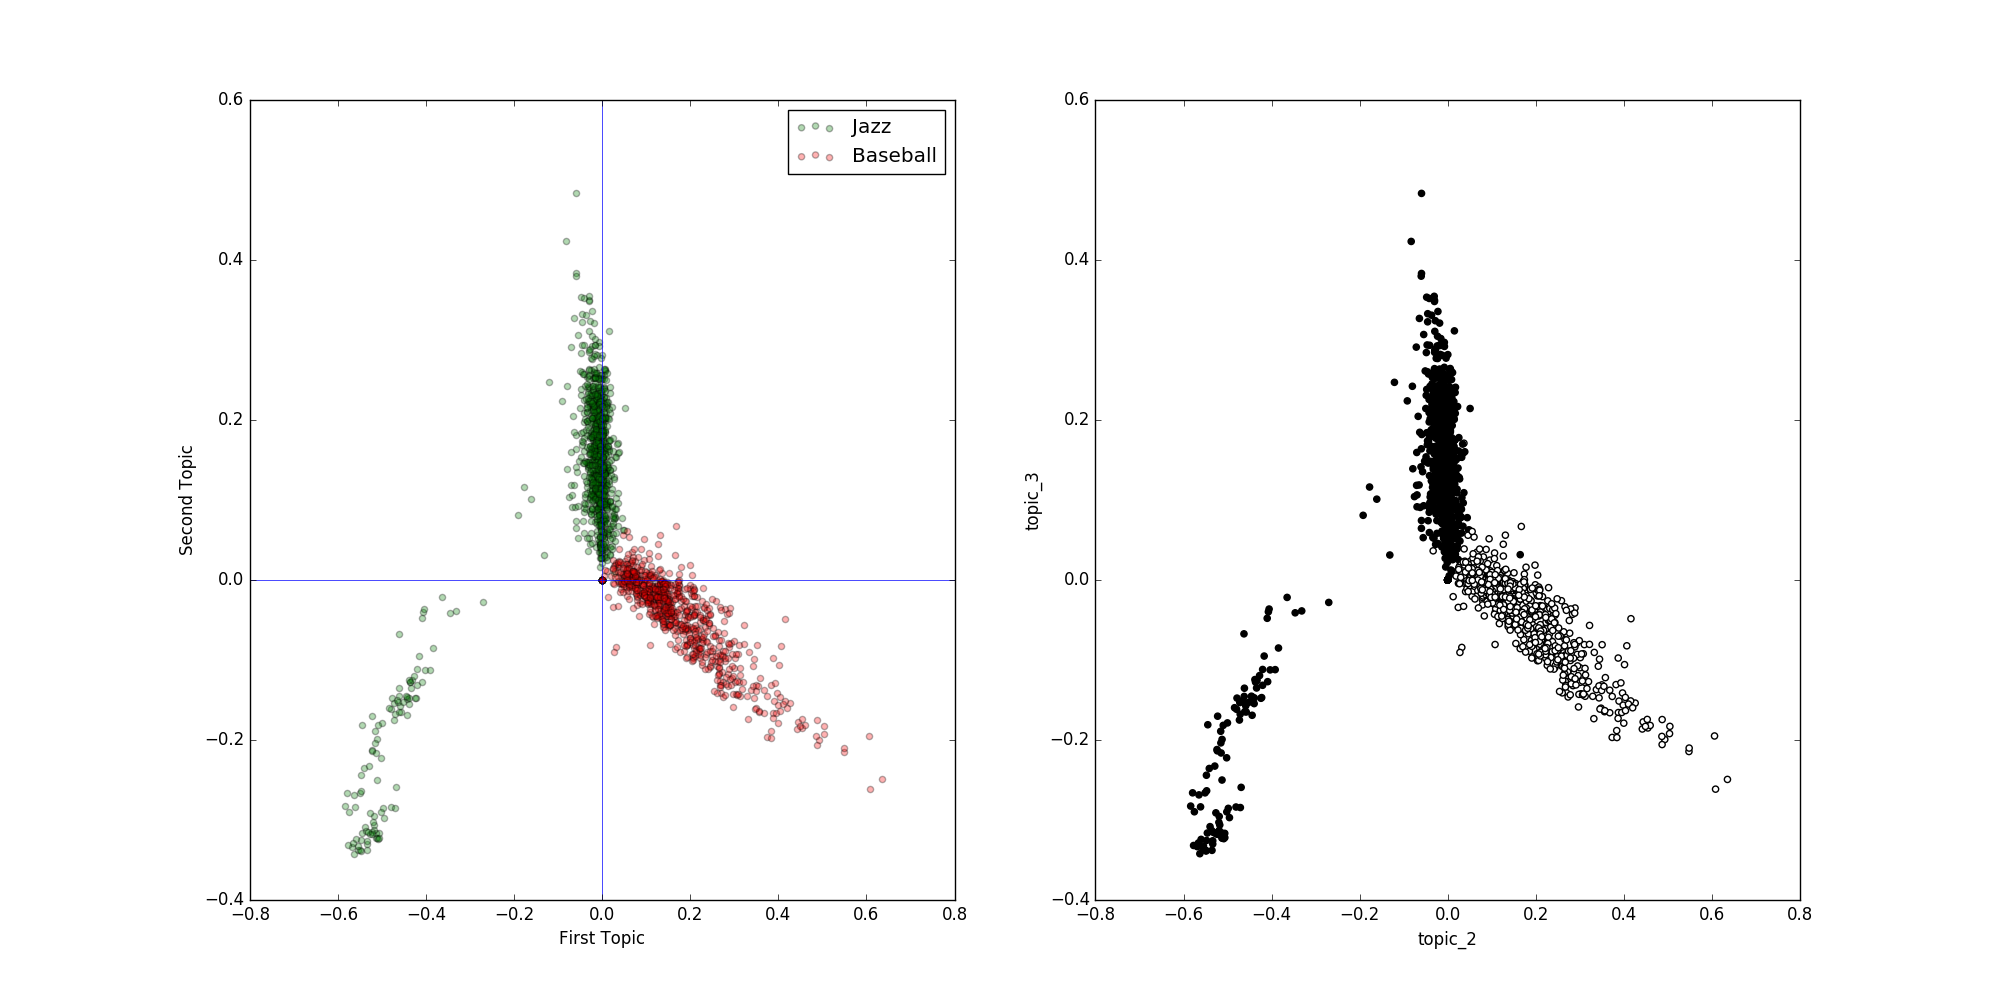

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(20,10))

for val in topic_encoded_df.is_baseball.unique():
  topic_1 = topic_encoded_df[topic_encoded_df.is_baseball == val]['topic_2'].values
  topic_2 = topic_encoded_df[topic_encoded_df.is_baseball == val]['topic_3'].values
  print(val)
  color = "red" if val else "green"
  label = "Baseball" if val else "Jazz"
  ax[0].scatter(topic_1, topic_2, c=color, alpha=0.3, label=label)
  
topic_encoded_df.plot(kind="scatter", x="topic_2", y="topic_3", c=labels, ax=ax[1])
# made the colors represent different books

ax[0].set_xlabel('First Topic')
ax[0].set_ylabel('Second Topic')
ax[0].axvline(linewidth=0.5)
ax[0].axhline(linewidth=0.5)
ax[0].legend()

display(fig)

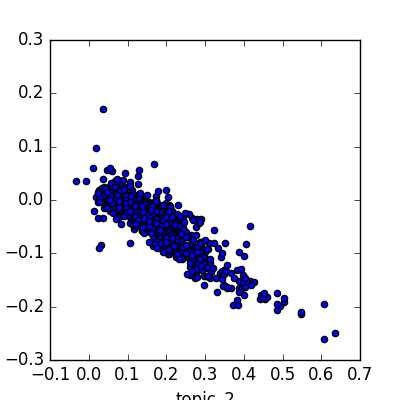

In [48]:
fig, ax = plt.subplots(figsize=(4,4))
topic_encoded_df[labels==0].plot(kind="scatter", x="topic_2", y="topic_3", ax=ax)
display(fig)

In [49]:
jazz = topic_encoded_df[labels==0]

In [50]:
vectorizer_jazz = TfidfVectorizer(stop_words='english', preprocessor=no_number_preprocessor)
bag_of_words_jazz = vectorizer_jazz.fit_transform(jazz.text)
svd_jazz = TruncatedSVD(n_components=20)
lsa_jazz = svd_jazz.fit_transform(bag_of_words_jazz)
encoding_matrix_jazz = pd.DataFrame(svd_jazz.components_,
                               index=['topic_' + str(i) for i in range(1,21)],
                               columns=vectorizer_jazz.get_feature_names()).T
encoding_matrix_jazz["dictionary"] = vectorizer_jazz.get_feature_names()
list(encoding_matrix_jazz.sort_values('topic_1', ascending=False).head(5).dictionary)

gmm = GaussianMixture(n_components=2)
gmm.fit(jazz[twenty_topics])
jazz_labels = gmm.predict(jazz[twenty_topics])

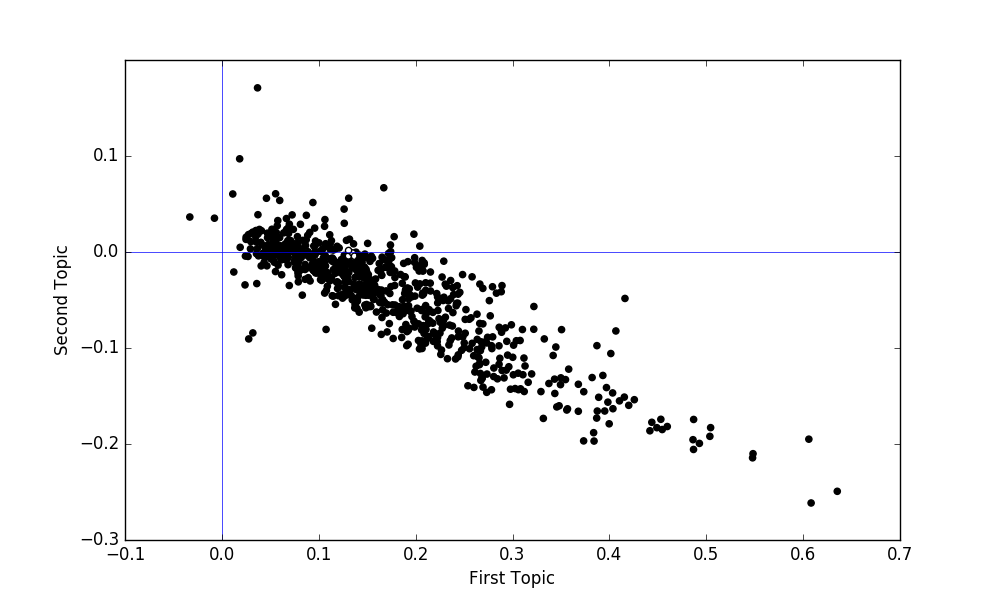

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(10,6))

jazz.plot(kind="scatter", x="topic_2", y="topic_3", c=jazz_labels, ax=ax)
# made the colors represent different books

ax.set_xlabel('First Topic')
ax.set_ylabel('Second Topic')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

display(fig)

In [52]:
jazz_group_1 = jazz[jazz_labels == 0]
jazz_group_2 = jazz[jazz_labels == 1]

In [53]:
display(jazz_group_1[["title", "text"]].head())

title,text
1988 MLB Japan All-Star Series,"The 1988 MLB Japan All-Star Series was the second edition of the championship, a best-of-seven series between the All-Star teams from Major League Baseball (MLB) and Nippon Professional Baseball (NPB), then-called All-Japan. MLB won the series by 3–2–2 and Barry Larkin was named MVP. == Results == Championship == Rosters == === MLB All-Stars roster === === NPB All-Stars (All-Japan) roster === == References =="
1990 MLB Japan All-Star Series,"The 1990 MLB Japan All-Star Series was the third edition of the championship, a best-of-eight series between the All-Star teams from Major League Baseball (MLB) and Nippon Professional Baseball (NPB), then-called All-Japan. NPB won the series by 4–3–1 but Ken Griffey Jr. (MLB player) was named MVP. == Results == Championship == Rosters == === MLB All-Stars roster === === NPB All-Stars (All-Japan) roster === == References =="
1992 MLB Japan All-Star Series,"The 1992 MLB Japan All-Star Series was the fourth edition of the championship, a best-of-eight series between the All-Star teams from Major League Baseball (MLB) and Nippon Professional Baseball (NPB), then-called All-Japan. MLB won the series by 6–1–1 and Mark Grace was named MVP. == Results == Championship == Rosters == === MLB All-Stars roster === === NPB All-Stars (All-Japan) roster === == References =="
1996 MLB Japan All-Star Series,"The 1996 MLB Japan All-Star Series was the fifth edition of the championship, a best-of-eight series between the All-Star teams from Major League Baseball (MLB) and Nippon Professional Baseball (NPB), then-called All-Japan. MLB won the series by 4–2–2 and Steve Finley was named MVP. == Results == Championship == Rosters == === MLB All-Stars roster === === NPB All-Stars (All-Japan) roster === == References =="
1998 MLB Japan All-Star Series,"The 1998 MLB Japan All-Star Series was the sixth edition of the championship, a best-of-eight series between the All-Star teams from Major League Baseball (MLB) and Nippon Professional Baseball (NPB), then-called All-Japan. MLB won the series by 6–2–0 and Sammy Sosa was named MVP. This is the first - and as of 2014, the only series that was solely held at the Tokyo Dome == Results == Championship == Rosters == === MLB All-Stars roster === === NPB All-Stars (All-Japan) roster === == References =="


In [54]:
vectorizer_1 = TfidfVectorizer(stop_words='english', preprocessor=no_number_preprocessor)
vectorizer_2 = TfidfVectorizer(stop_words='english', preprocessor=no_number_preprocessor)
bag_of_words_jazz_1 = vectorizer_1.fit_transform(jazz_group_1.text)
bag_of_words_jazz_2 = vectorizer_2.fit_transform(jazz_group_2.text)

In [55]:
svd_1 = TruncatedSVD(n_components=20)
lsa = svd_1.fit_transform(bag_of_words_jazz_1)
encoding_matrix_1 = pd.DataFrame(svd_1.components_,
                               index=['topic_' + str(i) for i in range(1,21)],
                               columns=vectorizer_1.get_feature_names()).T
encoding_matrix_1["dictionary"] = vectorizer_1.get_feature_names()
list(encoding_matrix_1.sort_values('topic_1', ascending=False).head(5).dictionary)

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-1284676759746456> in <module> () 
 3 encoding_matrix_1 = pd.DataFrame(svd_1.components_,
 4 index = [ 'topic_' + str ( i ) for i in range ( 1 , 21 ) ] , 
 ----> 5 columns=vectorizer_1.get_feature_names()).T
 6 encoding_matrix_1 [ "dictionary" ] = vectorizer_1 . get_feature_names ( ) 
 7 list ( encoding_matrix_1 . sort_values ( 'topic_1' , ascending = False ) . head ( 5 ) . dictionary ) 

 /databricks/python/lib/python3.5/site-packages/pandas/core/frame.py in __init__ (self, data, index, columns, dtype, copy) 
 295 else : 
 296 mgr = self._init_ndarray(data, index, columns, dtype=dtype,
 --> 297 copy=copy)
 298 elif isinstance ( data , ( list , types . GeneratorType ) ) : 
 299 if isinstance ( data , types . GeneratorType ) : 

 /databricks/python/lib/python3.5/site-packages/pandas/core/frame.py in _init_ndarray (self, values, index, columns, dtype, copy) 
 472 values = _possibly_infer_to_datetimelike ( values ) 
 473 
 --> 474 return create_block_manager_from_blocks ( [ values ] , [ columns , index ] ) 
 475 
 476 @ property 

 /databricks/python/lib/python3.5/site-packages/pandas/core/internals.py in create_block_manager_from_blocks (blocks, axes) 
 4254 blocks = [ getattr ( b , 'values' , b ) for b in blocks ] 
 4255 tot_items = sum ( b . shape [ 0 ] for b in blocks ) 
 -> 4256 construction_error ( tot_items , blocks [ 0 ] . shape [ 1 : ] , axes , e ) 
 4257 
 4258 

 /databricks/python/lib/python3.5/site-packages/pandas/core/internals.py in construction_error (tot_items, block_shape, axes, e) 
 4231 raise ValueError ( "Empty data passed with indices specified." ) 
 4232 raise ValueError("Shape of passed values is {0}, indices imply {1}".format(
 -> 4233 passed, implied))
 4234 
 4235 

 ValueError : Shape of passed values is (49, 7), indices imply (49, 20)

In [56]:
svd_2 = TruncatedSVD(n_components=20)
lsa = svd_2.fit_transform(bag_of_words_jazz_2)
encoding_matrix_2 = pd.DataFrame(svd_2.components_,
                               index=['topic_' + str(i) for i in range(1,21)],
                               columns=vectorizer_2.get_feature_names()).T
encoding_matrix_2["dictionary"] = vectorizer_2.get_feature_names()
list(encoding_matrix_2.sort_values('topic_1', ascending=False).head(5).dictionary)

Out[ 79 ]: ['ball', 'base', 'baseball', 'game', 'league']

In [57]:
print(list(encoding_matrix_1.sort_values('topic_1', ascending=False).head(5).dictionary))
print(list(encoding_matrix_1.sort_values('topic_2', ascending=False).head(5).dictionary))
print(list(encoding_matrix_1.sort_values('topic_3', ascending=False).head(5).dictionary))
print(list(encoding_matrix_1.sort_values('topic_4', ascending=False).head(5).dictionary))
print(list(encoding_matrix_1.sort_values('topic_5', ascending=False).head(5).dictionary))
print(list(encoding_matrix_1.sort_values('topic_6', ascending=False).head(5).dictionary))
print(list(encoding_matrix_1.sort_values('topic_7', ascending=False).head(5).dictionary))
print(list(encoding_matrix_1.sort_values('topic_8', ascending=False).head(5).dictionary))
print(list(encoding_matrix_1.sort_values('topic_9', ascending=False).head(5).dictionary))
print(list(encoding_matrix_1.sort_values('topic_10', ascending=False).head(5).dictionary))

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-1284676759746458> in <module> () 
 ----> 1 print ( list ( encoding_matrix_1 . sort_values ( 'topic_1' , ascending = False ) . head ( 5 ) . dictionary ) ) 
 2 print ( list ( encoding_matrix_1 . sort_values ( 'topic_2' , ascending = False ) . head ( 5 ) . dictionary ) ) 
 3 print ( list ( encoding_matrix_1 . sort_values ( 'topic_3' , ascending = False ) . head ( 5 ) . dictionary ) ) 
 4 print ( list ( encoding_matrix_1 . sort_values ( 'topic_4' , ascending = False ) . head ( 5 ) . dictionary ) ) 
 5 print ( list ( encoding_matrix_1 . sort_values ( 'topic_5' , ascending = False ) . head ( 5 ) . dictionary ) ) 

 NameError : name 'encoding_matrix_1' is not defined

In [58]:
print(list(encoding_matrix_2.sort_values('topic_1', ascending=False).head(5).dictionary))
print(list(encoding_matrix_2.sort_values('topic_2', ascending=False).head(5).dictionary))
print(list(encoding_matrix_2.sort_values('topic_3', ascending=False).head(5).dictionary))
print(list(encoding_matrix_2.sort_values('topic_4', ascending=False).head(5).dictionary))
print(list(encoding_matrix_2.sort_values('topic_5', ascending=False).head(5).dictionary))
print(list(encoding_matrix_2.sort_values('topic_6', ascending=False).head(5).dictionary))
print(list(encoding_matrix_2.sort_values('topic_7', ascending=False).head(5).dictionary))
print(list(encoding_matrix_2.sort_values('topic_8', ascending=False).head(5).dictionary))
print(list(encoding_matrix_2.sort_values('topic_9', ascending=False).head(5).dictionary))
print(list(encoding_matrix_2.sort_values('topic_10', ascending=False).head(5).dictionary))

['ball', 'base', 'baseball', 'game', 'league']
['baseball', 'league', 'teams', 'series', 'major']
['runner', 'base', 'baseball', 'ball', 'league']
['leaders', 'kbo', 'runs', 'career', 'list']
['runner', 'base', 'game', 'second', 'series']
['european', 'championship', 'tournament', 'women', 'runs']
['league', 'girls', 'professional', 'ball', 'pitch']
['handed', 'pitcher', 'baseman', 'left', 'right']
['kbo', 'leaders', 'list', 'career', 'game']
['kbo', 'leaders', 'career', 'field', 'left']